# Simulation of viscous flow between parallel plates

This notebook creates and runs a little simulation model of Couette flow, or flow between parallel plates in which one plate is moving relative to the other.

(Translated from earlier matlab version, GE Tucker, 2019)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

The block below defines the code for the model:

In [2]:
class MomentumDiffuser(object):
    
    def __init__(self,
                 viscosity=0.001,
                 density=1000.0,
                 top_plate_speed=0.1,
                 dist_btwn_plates=0.01,
                 num_layers=100,
                ):
        """Initialize the MomentumDiffuser.
        
        Parameters
        ----------
        viscosity : float
            Fluid viscosity, Pa s
        density : float
            Fluid density, kg / m3
        top_plate_speed : float
            Speed of top plate, m / s
        dist_btwn_plates : float
            Distance between plates, m
        num_layers : int
            Number of fluid layers
        """
        STABILITY_FACTOR = 0.2
        kin_visc = viscosity / density
        self.dx = dist_btwn_plates / num_layers
        self.timestep_duration = STABILITY_FACTOR * self.dx * self.dx / kin_visc
        self.speed = np.zeros(num_layers)
        self.speed[-1] = top_plate_speed
        self.alpha = kin_visc * self.timestep_duration / (self.dx * self.dx)

    def run_one_step(self):
        """Advance for one time step"""
        self.speed[1:-1] += self.alpha * (self.speed[2:] - 2 * self.speed[1:-1] + self.speed[:-2])
        
    def run_n_steps(self, n):
        for i in range(n):
            self.run_one_step()

In the next block, we creat an *instance* of the model. This initializes it but does not actually run it.

In [3]:
top_plate_speed=0.1
dist_btwn_plates=0.01
md = MomentumDiffuser(top_plate_speed=top_plate_speed, dist_btwn_plates=dist_btwn_plates)

Let's check what the time-step size is:

In [4]:
print('Time step size is ' + str(md.timestep_duration) + ' seconds.')

Time step size is 0.002 seconds.


Set some parameters that will control our run and the capturing of output:

In [5]:
nsteps = 1000
save_every = 200

The next few cells set up the animation

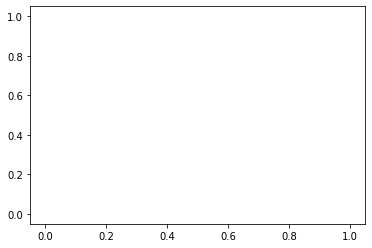

In [6]:
# First, set up a blank figure
fig, ax = plt.subplots()

# And placeholder lists for data
xdata = []
ydata = []
obj = ax.plot([], [], color = 'k')

In [7]:
# Then, set up an initialization function
def init():
    ax.set_xlim(0, top_plate_speed)
    ax.set_ylim(0, dist_btwn_plates)
    ax.set_xlabel('Speed (m/s)')
    ax.set_ylabel('Distance (m)')
    return(obj)

In [8]:
# Next, define the update function
def update(i):
    ax.cla()
    md.run_n_steps(save_every)
    xdata = md.speed
    ydata = np.linspace(0, dist_btwn_plates, len(md.speed))
    ax.set_xlabel('Speed (m/s)')
    ax.set_ylabel('Distance (m)')
    obj = ax.plot(xdata, ydata, color = 'k')
    return(obj)

Now, use FuncAnimation to run the model.

In [9]:
# Run the animation!
anim = FuncAnimation(fig, update, 100, init_func = init, blit = True)
plt.show()

In [10]:
# Convert the animation to HTML
vid = HTML(anim.to_html5_video())

In [11]:
vid
# If you modify any component of the animation, restart your iPython kernel and re-run all of the above cells.